In [1]:
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import numpy as np

In [62]:
data = pd.read_csv('regularity_8_totals.csv') 

In [57]:
data.count()

sum(actual_headway_seconds)           4
sum(actual_headway_squared)           4
sum(scheduled_headway_seconds)        4
sum(scheduled_headway_squared)        4
average(scheduled_headway_minutes)    4
SWT                                   4
AWT                                   4
EWT                                   4
Period                                4
dtype: int64

In [23]:
data.columns = data.iloc[0]

In [30]:
data.drop(data.index[0], inplace=True)

In [52]:
data

,sum(actual_headway_seconds),sum(actual_headway_squared),sum(scheduled_headway_seconds),sum(scheduled_headway_squared),average(scheduled_headway_minutes),SWT,AWT,EWT,Period
0,213026.0,95637576.0,210648.0,85031594.0,5.255689,201.833376,224.473952,22.640575,07:00-09:00
1,654956.0,342782966.0,656417.0,292353201.0,6.167014,222.688627,261.683965,38.995338,10:00-16:00
2,322806.0,130788618.0,323087.0,120794591.0,5.422743,186.938179,202.580835,15.642656,16:00-19:00
3,308954.0,299047734.0,303796.0,278714790.0,12.818397,458.720309,483.968057,25.247748,20:00-23:00


In [44]:
data.columns

Index(['Period', 'SWT', 'AWT', 'EWT'], dtype='object')

In [58]:
data = data[['Period', 'SWT','AWT', 'EWT']]

In [21]:
data = data[['Period', 'SWT','AWT', 'EWT']].transpose()

In [59]:
df_plot = pd.melt(data, id_vars=['Period'], value_vars=['SWT','AWT', 'EWT'])

In [60]:
df_plot

,Period,variable,value
0,07:00-09:00,SWT,201.833376
1,10:00-16:00,SWT,222.688627
2,16:00-19:00,SWT,186.938179
3,20:00-23:00,SWT,458.720309
4,07:00-09:00,AWT,224.473952
5,10:00-16:00,AWT,261.683965
6,16:00-19:00,AWT,202.580835
7,20:00-23:00,AWT,483.968057
8,07:00-09:00,EWT,22.640575
9,10:00-16:00,EWT,38.995338


In [61]:
df_plot.to_csv('db_line_8_waiting.csv', index=False)

In [9]:
data['Period'] = data['Period'].apply(lambda x: x.replace('From ', '').replace(' to ', '-'))

In [11]:
x = data['Period']

In [18]:
data['EWT']

0    22.640575
1    38.995338
2    15.642656
3    25.247748
Name: EWT, dtype: float64

In [39]:
data.to_csv('regularity_8_totals.csv', index=False)

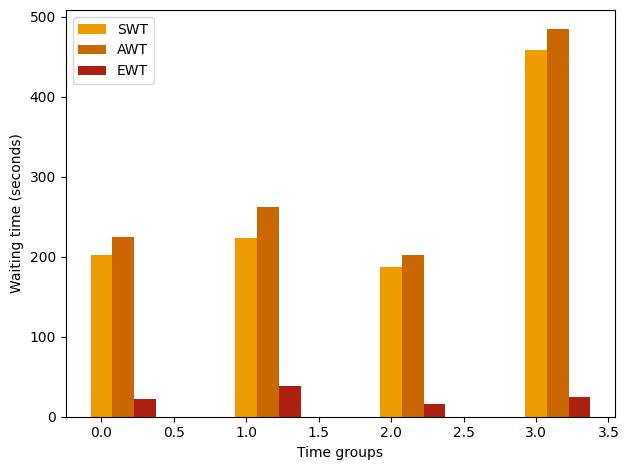

In [65]:
fig, ax = plt.subplots()

ind = np.arange(4)
width = 0.15


swt = data['SWT']
awt = data['AWT']
ewt = data['EWT']

# per dimension
colors = ['#ee9b00', '#ca6702', '#ae2012']
# markers = ['x','o','v']

# all_groups = [ ewt, awt, swt ]
all_groups = [ swt, awt, ewt ]

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate(all_groups):
  # compute position for each bar
  bar_position = width*i
  ax.bar( ind + bar_position, bar_values, width, color=colors[i] )

# ax.bar(x, swt, width=1, color='green', edgecolor="white", linewidth=0.7)
# ax.bar(x, awt, width=1, color='olive', edgecolor="white", linewidth=0.7)
plt.xlabel('Time groups')
plt.ylabel('Waiting time (seconds)')
# plt.xticks(ind + width, x)
plt.tight_layout()
ax.legend(['SWT', 'AWT', 'EWT'])
plt.show()